# Denoising Images with an Autoencoder

In [1]:
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalise into intensities
x_train = x_train / 255.0
x_test = x_test / 255.0

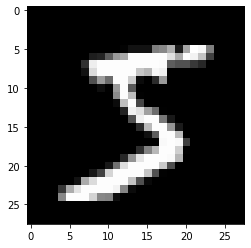

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
# This layer is for our image
input_img = keras.Input(shape=(784,))

# These layers are for our encoder
encoder = keras.layers.Dense(2000, activation='relu')(input_img)
encoder = keras.layers.Dense(500, activation='relu')(encoder)
encoder = keras.layers.Dense(500, activation='relu')(encoder)

# Sigmoid is used here to output normalised values 
latent_rep = keras.layers.Dense(10, activation='sigmoid')(encoder)

# These layers are for our decoder
decoder = keras.layers.Dense(500, activation='relu')(latent_rep)
decoder = keras.layers.Dense(500, activation='relu')(decoder)
decoder = keras.layers.Dense(2000, activation='relu')(decoder)

# Final reconstructed image
reconstruction = keras.layers.Dense(784)(decoder)

In [6]:
# Autoencoder model
model = keras.Model(input_img, reconstruction)

In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
# Only train on first 5000 images
x_subset = x_train[:5000].reshape(5000, 784)
noise = np.random.uniform(-0.5, 0.5, (5000, 784))

In [9]:
# Train on noisy images as input, and unaltered image as output
model.fit(x_subset + noise, x_subset, batch_size=128, epochs=50)

Train on 5000 samples
Epoch 1/50
5000/5000 [==============================] - 2s 328us/sample - loss: 0.0700
Epoch 2/50
5000/5000 [==============================] - 1s 268us/sample - loss: 0.0596
Epoch 3/50
5000/5000 [==============================] - 1s 271us/sample - loss: 0.0499
Epoch 4/50
5000/5000 [==============================] - 1s 269us/sample - loss: 0.0419
Epoch 5/50
5000/5000 [==============================] - 2s 418us/sample - loss: 0.0368
Epoch 6/50
5000/5000 [==============================] - 3s 587us/sample - loss: 0.0340
Epoch 7/50
5000/5000 [==============================] - 3s 568us/sample - loss: 0.0314
Epoch 8/50
5000/5000 [==============================] - 3s 581us/sample - loss: 0.0297
Epoch 9/50
5000/5000 [==============================] - 3s 552us/sample - loss: 0.0279
Epoch 10/50
5000/5000 [==============================] - 3s 560us/sample - loss: 0.0267
Epoch 11/50
5000/5000 [==============================] - 3s 555us/sample - loss: 0.0256
Epoch 12/50
5000/50

In [10]:
x_t = x_test[:20:5]
samples = x_t.reshape(len(x_t), 784)
sample_noise = np.random.uniform(-0.5, 0.5, (len(x_t), 784))
noised = samples + sample_noise

In [11]:
img = model.predict(noised).reshape(len(samples), 28, 28)

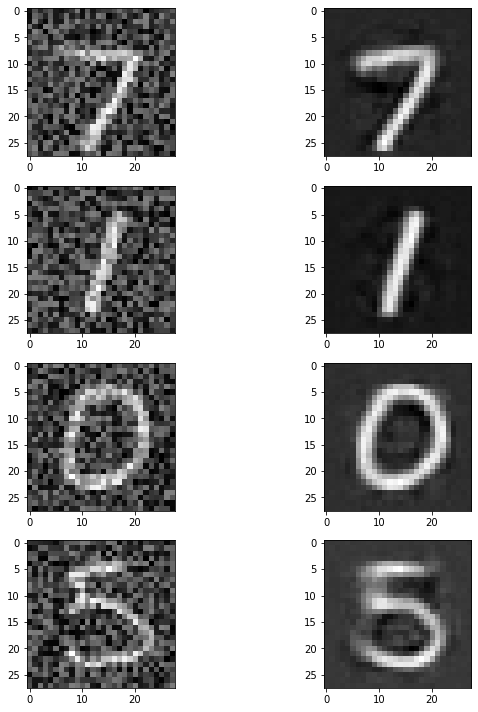

In [12]:
plt.figure(figsize=(10, 10))
for i in range(len(img)):
  plt.subplot(4, 2, 2 * i + 1)
  plt.imshow(noised[i].reshape(28, 28), cmap='gray')
  plt.subplot(4, 2, 2 * i + 2)
  plt.imshow(img[i], cmap='gray')
plt.tight_layout()
plt.savefig('reconstructed.png')